In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

from py_tools import gen_hist

In [2]:
data = pd.read_csv("boston_house_price.txt",sep='|')

In [130]:
data["TAX"].describe()

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: TAX, dtype: float64

In [122]:
y,x=np.histogram(data["RM"],range=[0,10],bins=10,density=True)
x=x[1:]

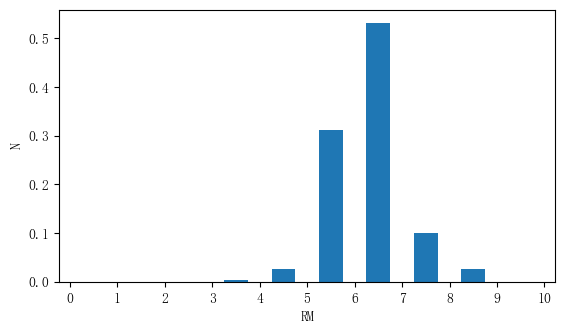

In [126]:
plt.figure(dpi=100,figsize=(6.4,3.6))
plt.bar(x-0.5,y,width=0.5)
plt.xticks(ticks=[0]+list(x))
plt.xlabel("RM")
plt.ylabel("N")
plt.show()

In [88]:
CHAS=Counter(data["CHAS"])

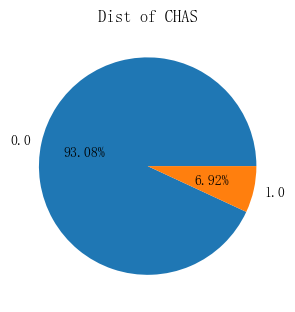

In [98]:
plt.figure(dpi=100,figsize=(6.4,3.6))
plt.pie(CHAS.values(),labels=CHAS.keys(),autopct="%.2f%%")
plt.title("Dist of CHAS")
plt.show()

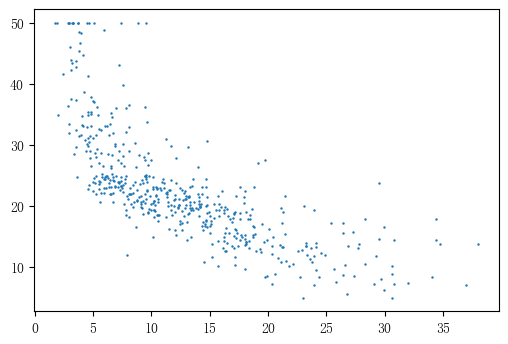

In [30]:
plt.figure(dpi=100)
plt.plot(data["LSTAT"],data.iloc[:,-1],'.',markersize=1.5)
plt.show()

In [1]:
from linear_model import LinearModel

In [2]:
data = pd.read_csv("boston_house_price.txt",sep='|')
data["LSTATS"]=data["LSTAT"]**2
#data = data[["NOX","RM","AGE","DIS","LSTAT","MEDV"]].values
data = data[["LSTAT","LSTATS","MEDV"]].values
X_train = data[:,:-1]
Y_train = data[:,[-1]]

In [3]:
model = LinearModel(2)

In [ ]:
model.training(X_train,Y_train,eps=0.001,alpha=0.000001)

learning ratio: 0.000014 , max gradient: 1.865209 , loss: 38.661528 , rsq: 0.0840629492184.000000 , rsq: -939545582656219136.000000000

In [ ]:
x=np.linspace(X_train[:,0].min(),X_train[:,0].max(),100)
x=np.array([x]).T
x=np.concatenate([x,x**2],axis=1)
y=model.predict(x)

plt.figure()
plt.plot(X_train[:,0],Y_train[:,0],'.')
plt.plot(x[:,0],y,'-')
plt.show()